In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.simplefilter("ignore")

In [56]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [6]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [57]:
df.drop(['Unnamed: 0', 'Booking_ID'], axis=1, inplace=True)

In [58]:
df.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [10]:
df.shape

(29020, 18)

In [11]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(21359, 18)

In [16]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [21]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

###### Our data is inbalanced

In [22]:
cat_cols = [
       'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'market_segment_type', 
       'repeated_guest','booking_status'
      ]

num_cols = [
       'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'
       ]

### DATA ANALYSIS

In [26]:
data = df.copy()

In [27]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


#### UNIVARIATE ANALYSIS

In [29]:
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize = (15, len(num_features)*5))
    if len(num_features)==1:
        axes = [axes]
    
    for i, col in enumerate(num_features):
        sns.histplot(data=df, x=col, ax=axes[i][0], kde=True, palette='Blues')
        axes[i][0].set_title(f"Histogram of {col}")

        sns.boxplot(data=df, x=col, ax=axes[i][1], palette='Blues')
        axes[i][1].set_title(f"Box Plot for {col}")

    plt.tight_layout()
    plt.show()
    


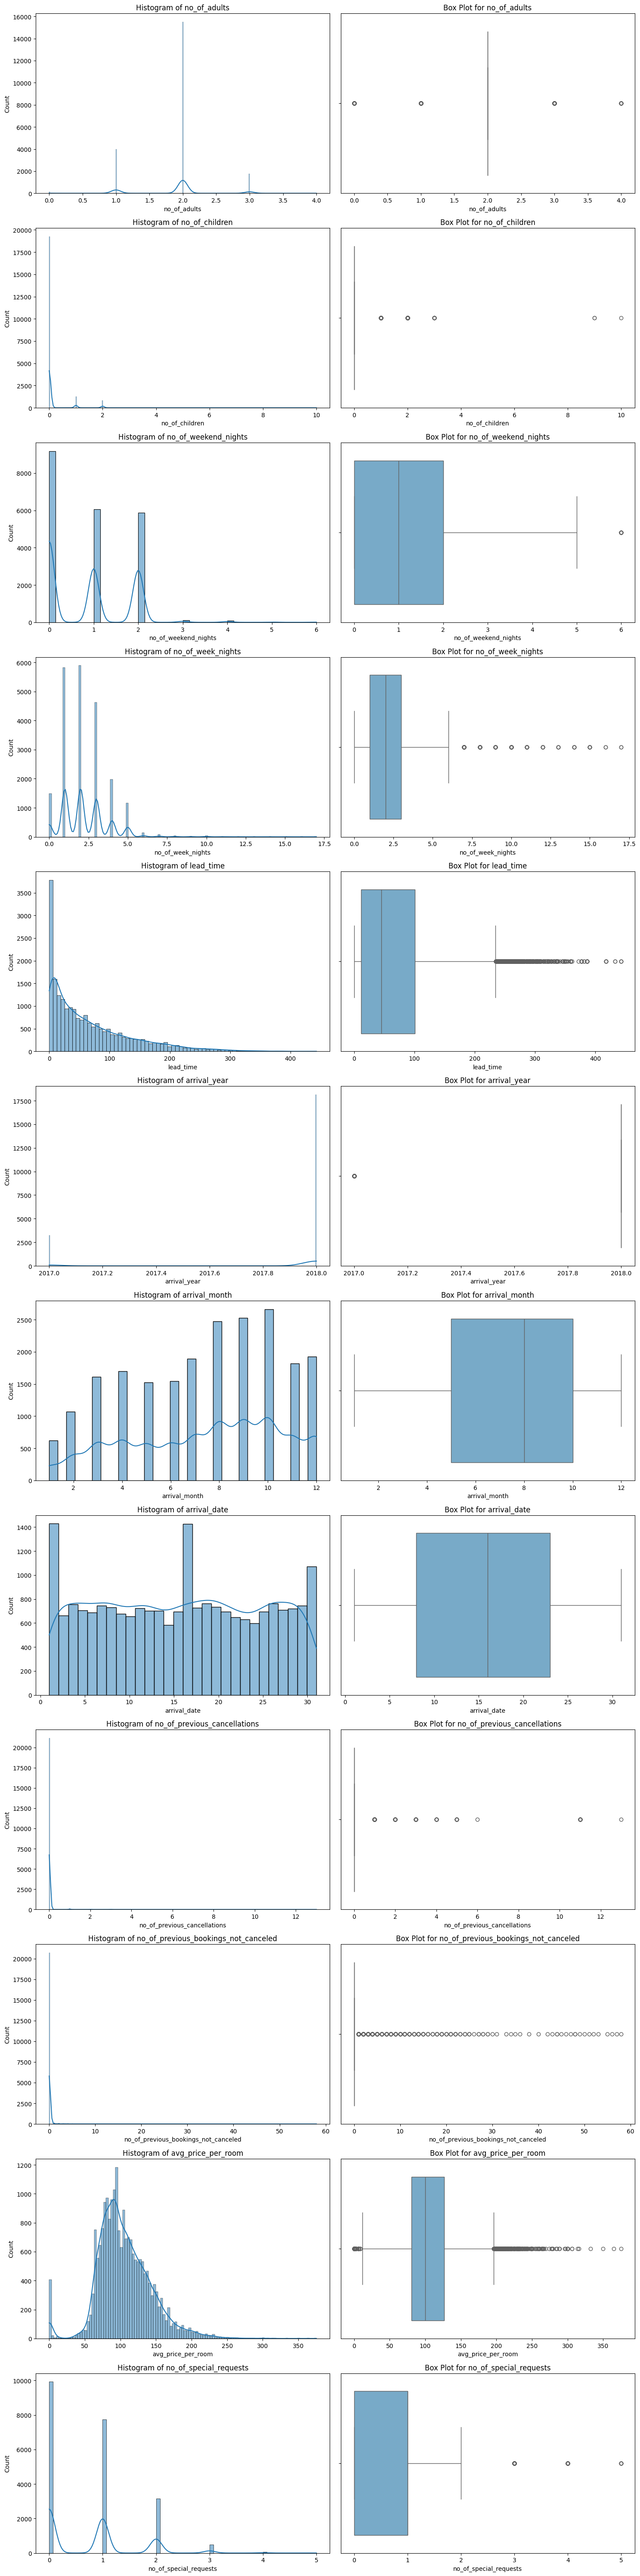

In [30]:
num_plot_dist(data, num_cols)

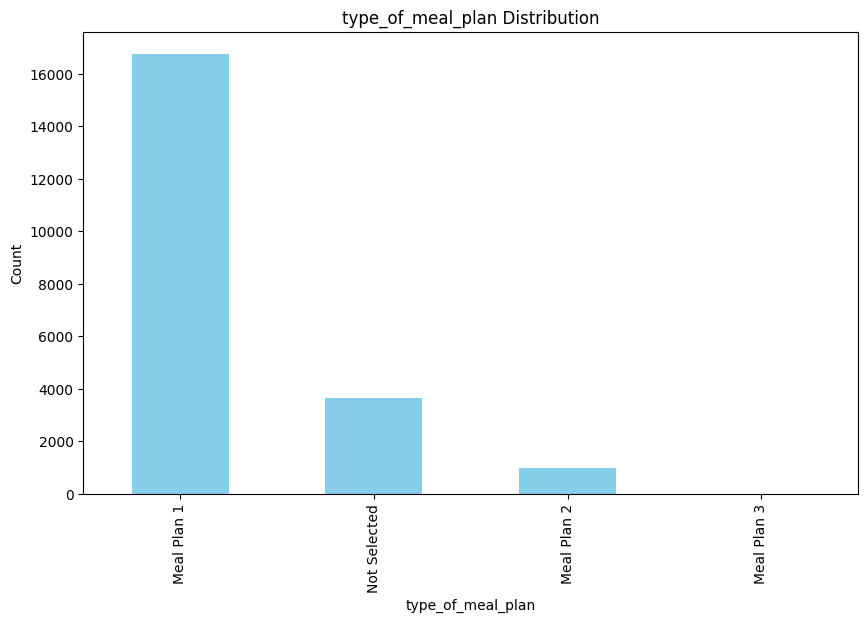

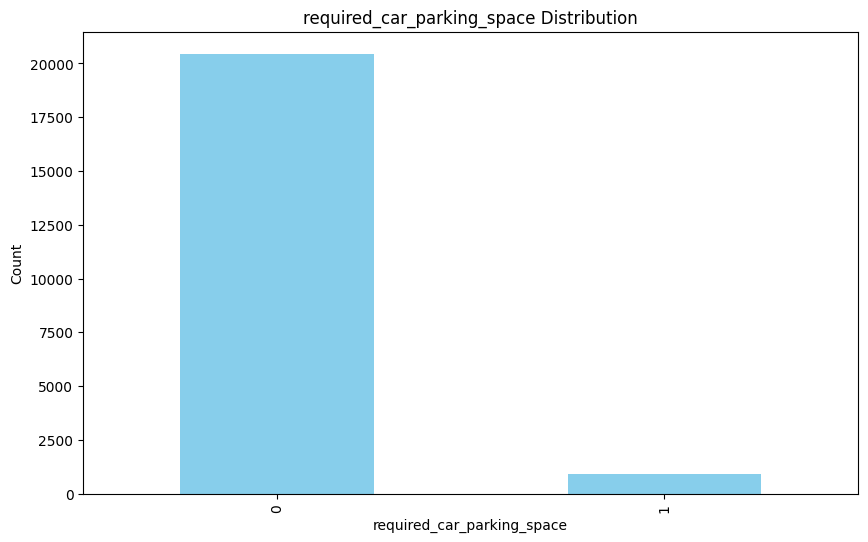

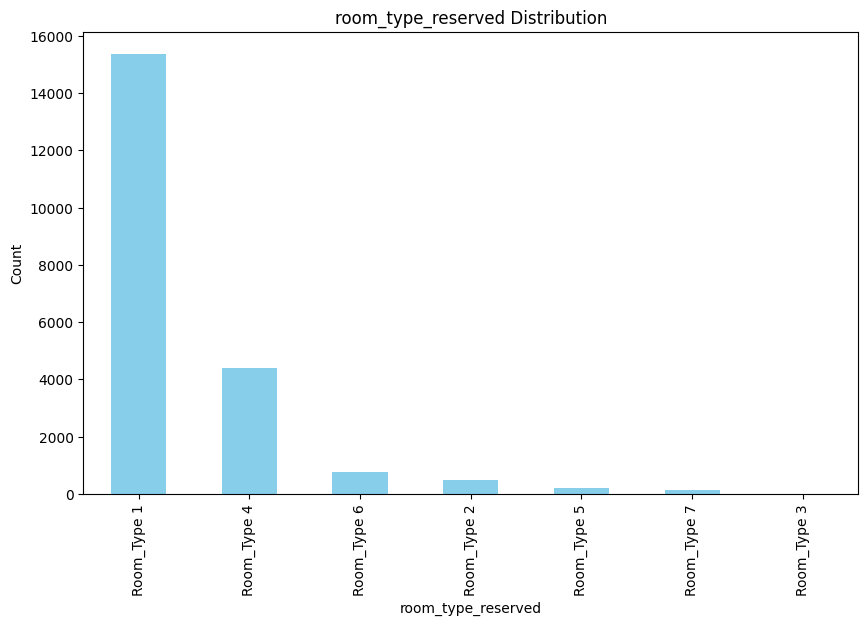

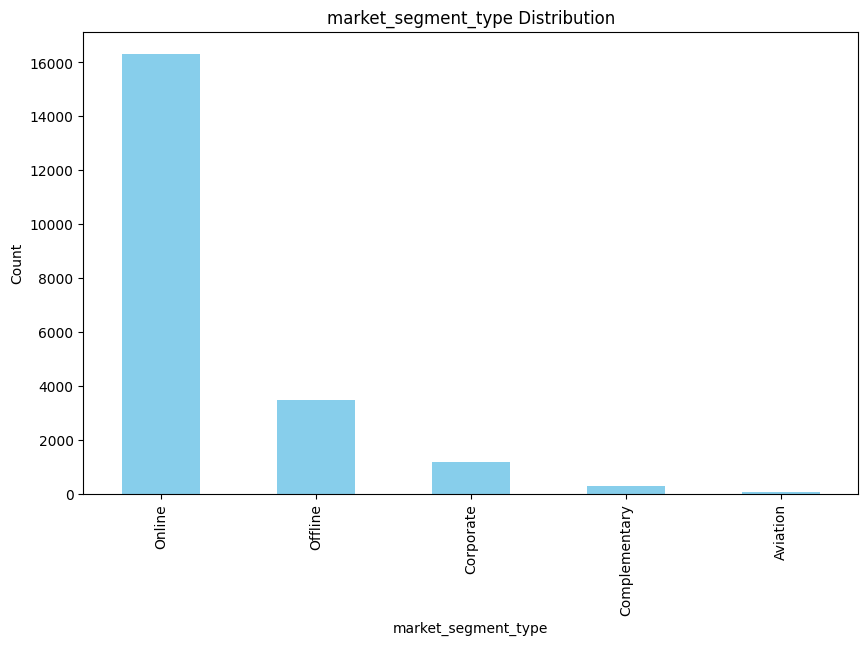

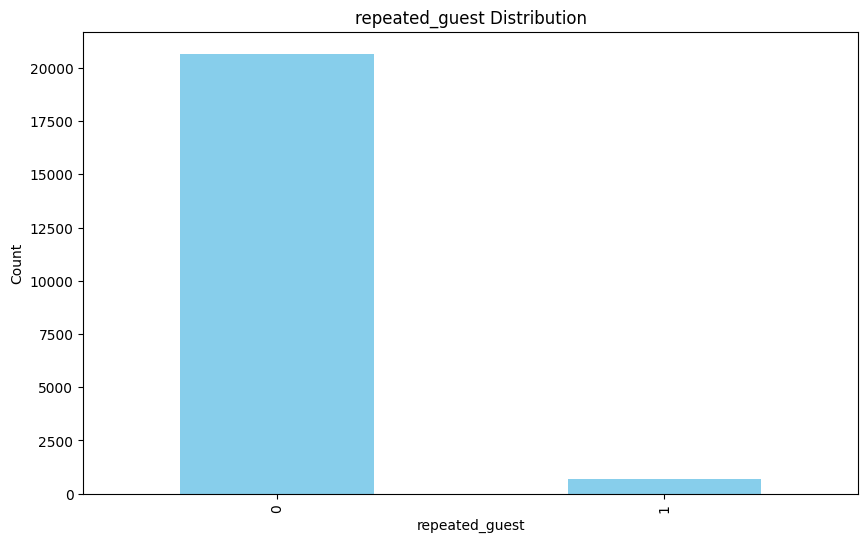

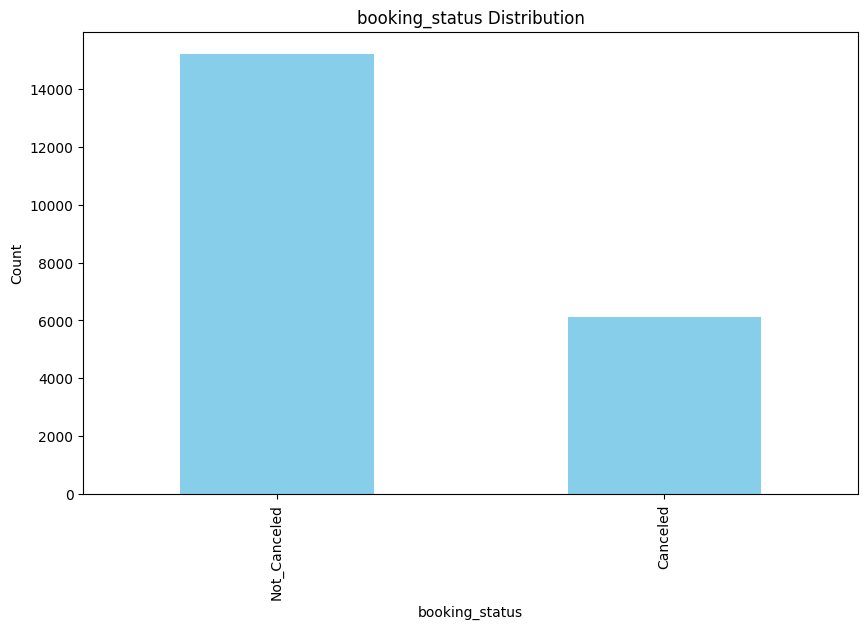

In [31]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar',color='skyblue')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

#### BIVARIATE ANALYSIS

In [35]:
def plot_bivariate_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig, axes = plt.subplots(num_rows, 2 , figsize=(15, num_rows*5))
    axes = axes.flatten()

    for i, col in enumerate(num_features):
        sns.boxplot(x=target, y=col, data = df, ax=axes[i], palette='Blues')
        axes[i].set_title(f"{col} VS {target}")
    
    plt.tight_layout()
    plt.show()



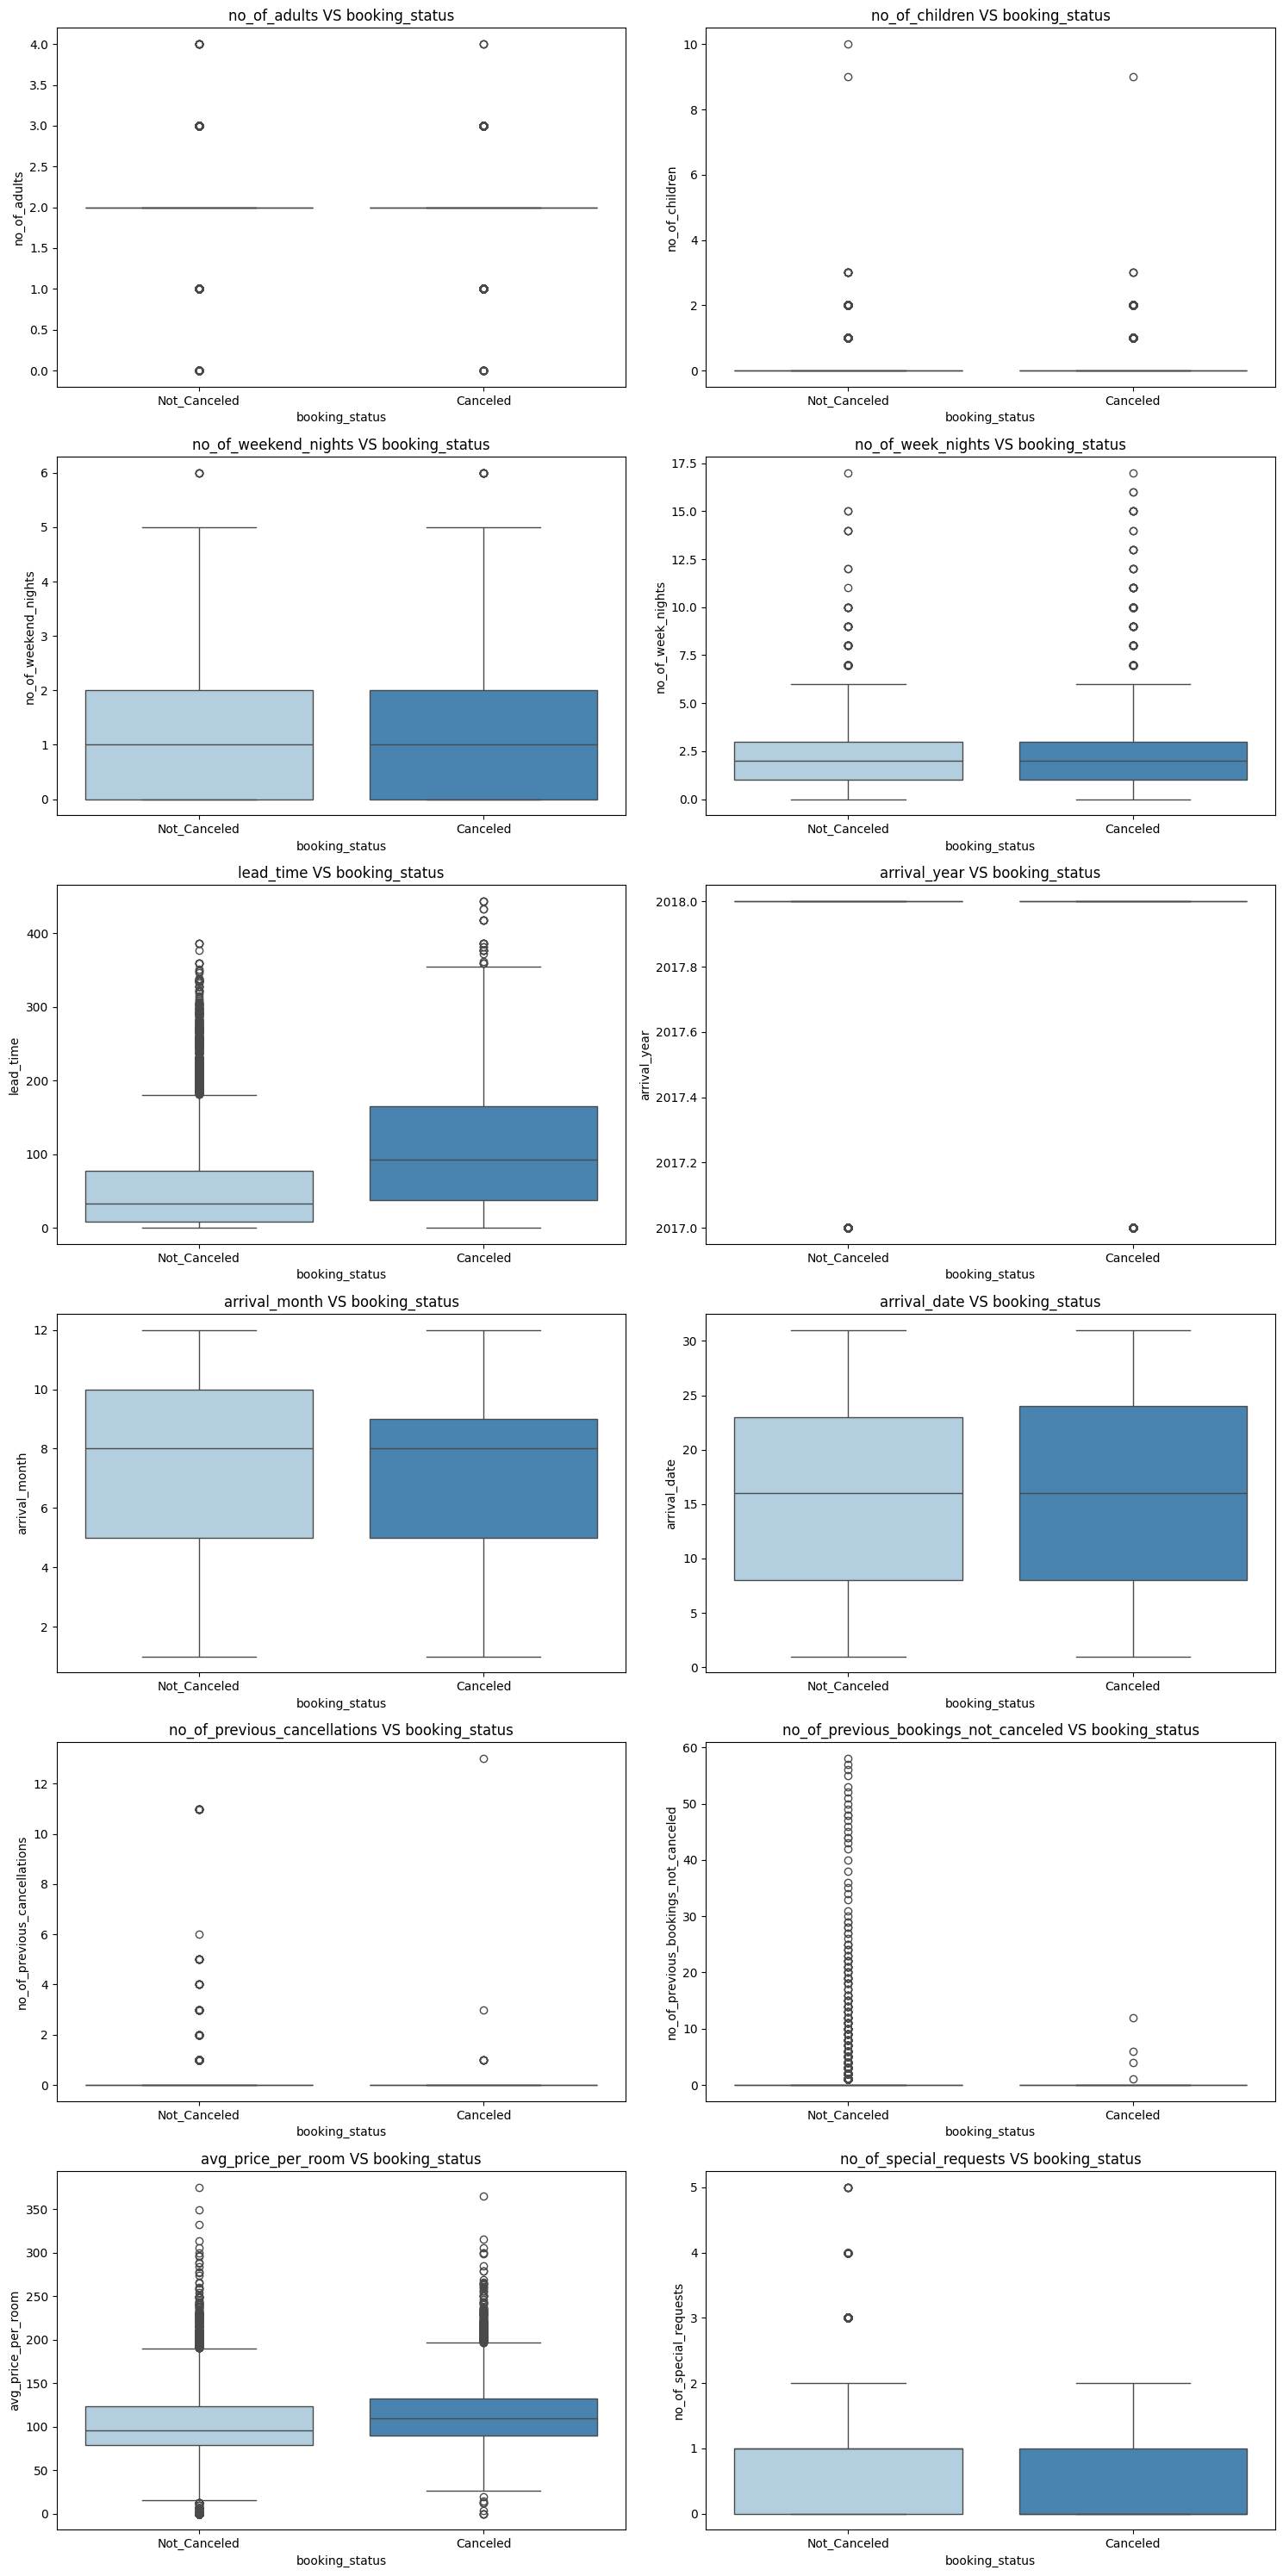

In [36]:
plot_bivariate_num(data, 'booking_status', num_cols)

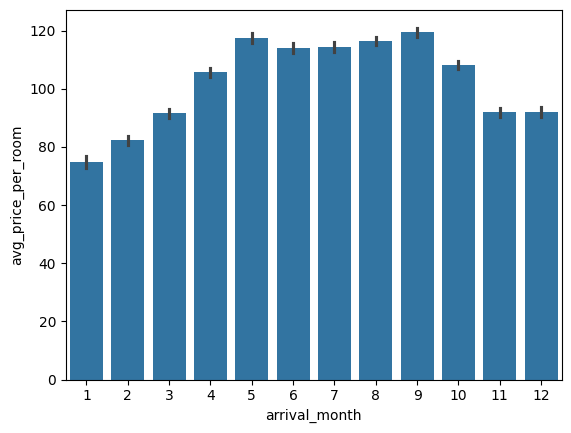

In [38]:
sns.barplot(x='arrival_month', y='avg_price_per_room', data= data)
plt.show()

In [39]:
def plot_bivariate_cat(df, target,  cat_features):
    num_plots = len(cat_features)
    num_rows = (num_plots+1)//2

    fig, axes = plt.subplots(num_rows, 2 , figsize=(15, num_rows*5))
    axes = axes.flatten()

    for i, col in enumerate(cat_features):
        sns.countplot(x=col, hue=target, data = df, ax=axes[i], palette='Set2')
        axes[i].set_title(f"{col} VS {target}")
        axes[i].tick_params(axis='x', rotation=90)
    
    plt.tight_layout()
    plt.show()

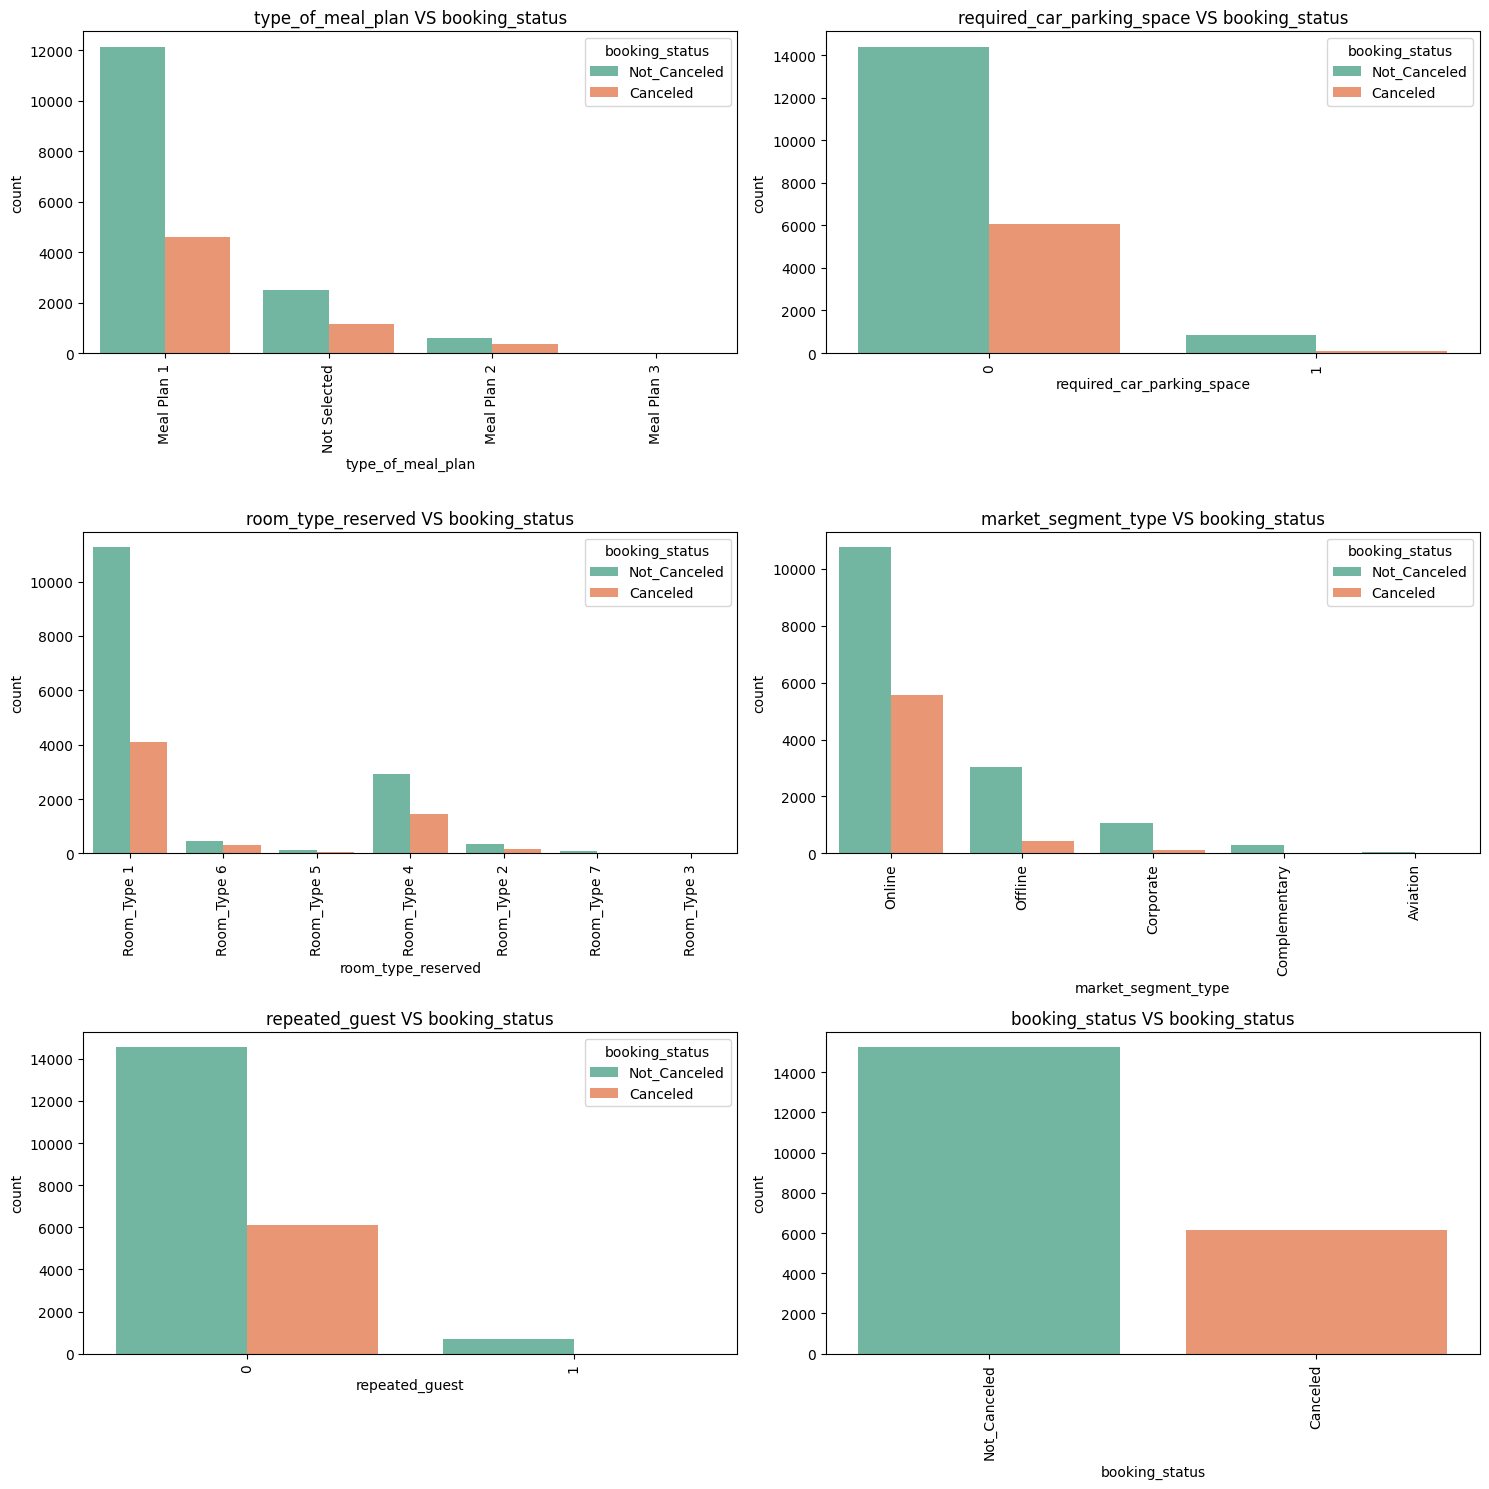

In [40]:
plot_bivariate_cat(data, 'booking_status', cat_cols)

#### DATA PROCESSING

In [41]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [45]:
##### LABEL ENCODING
from sklearn.preprocessing import LabelEncoder

In [59]:
label_encoder = LabelEncoder()

mappings = {}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

    mappings[col] = {label:code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

In [60]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [61]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29020 non-null  int64  
 1   no_of_children                        29020 non-null  int64  
 2   no_of_weekend_nights                  29020 non-null  int64  
 3   no_of_week_nights                     29020 non-null  int64  
 4   type_of_meal_plan                     29020 non-null  int64  
 5   required_car_parking_space            29020 non-null  int64  
 6   room_type_reserved                    29020 non-null  int64  
 7   lead_time                             29020 non-null  int64  
 8   arrival_year                          29020 non-null  int64  
 9   arrival_month                         29020 non-null  int64  
 10  arrival_date                          29020 non-null  int64  
 11  market_segment_

In [64]:
###### Multicollinearity

In [65]:
! pip install statsmodels

   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.5 MB 4.8 MB/s eta 0:00:02
   ---- ----------------------------------- 1.0/9.5 MB 3.8 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/9.5 MB 2.6 MB/s eta 0:00:04
   -------- ------------------------------- 2.1/9.5 MB 2.6 MB/s eta 0:00:03
   ------------ --------------------------- 2.9/9.5 MB 2.9 MB/s eta 0:00:03
   ------------- -------------------------- 3.1/9.5 MB 2.8 MB/s eta 0:00:03
   ------------- -------------------------- 3.1/9.5 MB 2.8 MB/s eta 0:00:03
   ------------- -------------------------- 3.1/9.5 MB 2.8 MB/s eta 0:00:03
   ------------- -------------------------- 3.1/9.5 MB 2.8 MB/s eta 0:00:03
   ----------------- ---------------------- 4.2/9.5 MB 2.0 MB/s eta 0:00:03
   --------------------- ------------------ 5.2/9.5 MB 2.2 MB/s eta 0:00:02
   ------------------------- -------------- 6.0/9.5 MB 2.4 MB/s eta 0:00:02
   ----------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [70]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [71]:
vif_data

,feature,VIF
0,const,3.585767e+07
1,no_of_adults,1.295419e+00
2,no_of_children,1.257749e+00
3,no_of_weekend_nights,1.062324e+00
4,no_of_week_nights,1.086849e+00
5,type_of_meal_plan,1.155976e+00
6,required_car_parking_space,1.036866e+00
7,room_type_reserved,1.530014e+00
8,lead_time,1.440424e+00
9,arrival_year,1.297431e+00


#### Our data has no multicollinearity


In [73]:
corr =df.corr()

In [74]:
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.023206,0.105348,0.107088,0.025929,0.012601,0.270178,0.096849,0.076599,0.018676,0.021653,0.311844,-0.193910,-0.047723,-0.119168,0.298806,0.186752,-0.091468
no_of_children,-0.023206,1.000000,0.029363,0.027730,-0.085639,0.031156,0.359788,-0.046830,0.049156,-0.003387,0.028185,0.135077,-0.036217,-0.016429,-0.021245,0.339916,0.126538,-0.030347
no_of_weekend_nights,0.105348,0.029363,1.000000,0.170348,-0.027533,-0.034955,0.058160,0.044089,0.052698,-0.011612,0.029413,0.127151,-0.066445,-0.020146,-0.027981,-0.007783,0.059582,-0.056956
no_of_week_nights,0.107088,0.027730,0.170348,1.000000,-0.078791,-0.051730,0.095343,0.154032,0.036798,0.037856,-0.007459,0.111961,-0.097529,-0.029076,-0.044622,0.024255,0.045760,-0.093921
type_of_meal_plan,0.025929,-0.085639,-0.027533,-0.078791,1.000000,-0.015095,-0.208296,-0.064028,0.069515,0.008640,0.005035,0.204802,-0.066835,-0.016406,-0.038117,-0.066362,0.020935,-0.027236
required_car_parking_space,0.012601,0.031156,-0.034955,-0.051730,-0.015095,1.000000,0.036740,-0.069882,0.021166,-0.017233,-0.003162,-0.004110,0.117608,0.026509,0.071711,0.059450,0.091292,0.090892
room_type_reserved,0.270178,0.359788,0.058160,0.095343,-0.208296,0.036740,1.000000,-0.106759,0.105152,-0.004403,0.028684,0.157289,-0.027335,-0.008770,-0.012025,0.472436,0.141985,-0.023396
lead_time,0.096849,-0.046830,0.044089,0.154032,-0.064028,-0.069882,-0.106759,1.000000,0.141433,0.134737,0.002029,-0.008181,-0.138162,-0.045136,-0.078447,-0.064011,-0.101831,-0.434425
arrival_year,0.076599,0.049156,0.052698,0.036798,0.069515,0.021166,0.105152,0.141433,1.000000,-0.339353,0.016373,0.149341,-0.017384,0.005358,0.026980,0.176304,0.058387,-0.173351
arrival_month,0.018676,-0.003387,-0.011612,0.037856,0.008640,-0.017233,-0.004403,0.134737,-0.339353,1.000000,-0.043967,-0.009681,0.005575,-0.037577,-0.005398,0.056038,0.108712,0.012487


<Axes: >

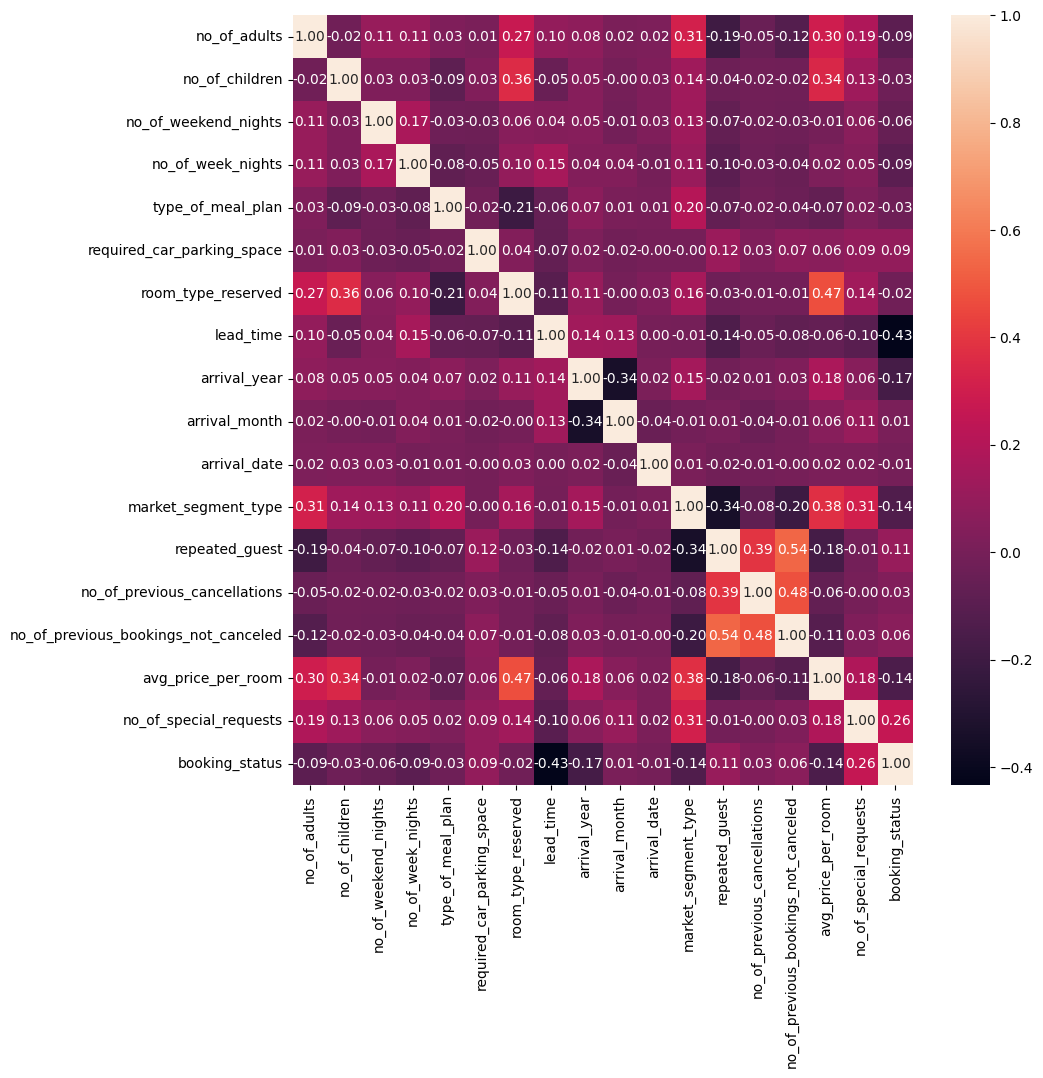

In [78]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt=".2f")

In [82]:
###### Skewness

skewness = df.skew()

In [83]:
skewness

no_of_adults                            -0.340838
no_of_children                           4.844412
no_of_weekend_nights                     0.719426
no_of_week_nights                        1.542808
type_of_meal_plan                        1.806612
required_car_parking_space               5.323647
room_type_reserved                       1.729866
lead_time                                1.289144
arrival_year                            -1.669774
arrival_month                           -0.346711
arrival_date                             0.027335
market_segment_type                     -1.670290
repeated_guest                           5.985562
no_of_previous_cancellations            14.550045
no_of_previous_bookings_not_canceled     8.897196
avg_price_per_room                       0.623772
no_of_special_requests                   1.150448
booking_status                          -0.741025
dtype: float64

In [84]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [85]:
###### Imbalanced Data

In [86]:
df["booking_status"].value_counts()

booking_status
1    19551
0     9469
Name: count, dtype: int64

In [87]:
X = df.drop(["booking_status"], axis=1)

y = df["booking_status"]

In [88]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [91]:
!pip install imbalanced-learn


   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   ---------------------------------------- 2/2 [imbalanced-learn]




[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [92]:
y.value_counts()

booking_status
1    19551
0     9469
Name: count, dtype: int64

In [93]:
from imblearn.over_sampling import SMOTE

In [94]:
smote = SMOTE(random_state=42)

In [95]:
X_res, y_res = smote.fit_resample(X, y)

In [97]:
y_res.value_counts()

booking_status
1    19551
0    19551
Name: count, dtype: int64

In [98]:
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df["booking_status"] = y_res

In [99]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0.0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0.0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0.0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0.0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0.0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [100]:
balanced_df.shape

(39102, 18)

In [101]:
df = balanced_df.copy()

In [102]:
##### Feature Selection

In [103]:
len(df.columns)

18

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
X = df.drop(["booking_status"], axis=1)

y = df["booking_status"]

In [107]:
model = RandomForestClassifier(random_state=42)
model.fit(X,y)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [109]:
feature_importance = model.feature_importances_

In [113]:
feature_importance_df = pd.DataFrame({
    'feature':X.columns,
    'importance':feature_importance,
})

In [118]:
top_feature_importance_df = feature_importance_df.sort_values(by= 'importance', ascending=False)

In [123]:
top_10_df = top_feature_importance_df["feature"].head(10).values
top_10_df = df[top_10_df.tolist() + ["booking_status"]]

In [124]:
top_10_df.head()

,lead_time,avg_price_per_room,no_of_special_requests,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,arrival_year,no_of_adults,booking_status
0,26,161.00,0,10,17,4,1,2,2017,2,1
1,98,121.50,2,7,16,4,1,1,2018,2,1
2,433,70.00,0,9,8,3,3,0,2018,2,0
3,195,72.25,0,8,8,3,5,2,2018,2,1
4,188,130.00,0,6,15,3,2,0,2018,1,0


In [125]:
len(top_10_df.columns)

11

In [126]:
df = top_10_df.copy()

### MODEL SELECTION

In [127]:
!pip install xgboost lightgbm

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 1.6 MB/s eta 0:00:46
   ---------------------------------------- 0.8/72.0 MB 1.6 MB/s eta 0:00:44
    --------------------------------------- 1.3/72.0 MB 1.7 MB/s eta 0:00:42
    --------------------------------------- 1.6/72.0 MB 1.7 MB/s eta 0:00:42
   - -------------------------------------- 2.1/72.0 MB 1.8 MB/s eta 0:00:39
   - -------------------------------------- 2.6/72.0 MB 1.9 MB/s eta 0:00:37
   - -------------------------------------- 3.1/72.0 MB 2.0 MB/s eta 0:00:35
   -- ------------------------------------- 3.7/72.0 MB 2.1 MB/s eta 0:00:34
   -- ------------------------------------- 3.9/72.0 MB 2.0 MB/s eta 0:00:34
   -- ------------------------------------- 4.7/72.0 MB 2.2 MB/s eta 0:00:32
   --- ------------------------------------ 5.5/72.0 MB 2.3 MB/s eta 0:00:30
   --- ------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [130]:
X = df.drop(["booking_status"], axis=1)

y = df["booking_status"]

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "support vector classifier": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Xgboost": XGBClassifier(random_state=42),
    "Adaboost": AdaBoostClassifier(random_state=42),
    "LGBM": LGBMClassifier(random_state=42)
}

In [135]:
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

In [136]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)




In [137]:
metrics_df = pd.DataFrame(metrics)

In [138]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.913182,0.909530,0.917222,0.913360
1,LogisticRegression,0.781741,0.787680,0.770118,0.778800
2,Gradient Boosting,0.838767,0.840774,0.834956,0.837855
3,support vector classifier,0.695308,0.661150,0.798565,0.723389
4,Decision Tree,0.880706,0.883097,0.876986,0.880031
5,KNN,0.831991,0.857064,0.796002,0.825405
6,Naive Bayes,0.755274,0.775499,0.717068,0.745140
7,Xgboost,0.899501,0.897246,0.901845,0.899540
8,Adaboost,0.779440,0.758367,0.818811,0.787431
9,LGBM,0.887355,0.879809,0.896720,0.888184


##### TRAIN RF MODEL

In [140]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [141]:
X = df.drop(["booking_status"], axis=1)

y = df["booking_status"]

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
rf = RandomForestClassifier(random_state=42)

In [144]:
params_dist= {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50), 
    'min_samples_split': randint(2,10),
    'min_samples_leaf': randint(1,5), 
    'bootstrap': [True, False]
}

In [145]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [146]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.8s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   6.3s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   6.6s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   6.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   6.5s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  11.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   4.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.3s
[CV]

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'bootstrap': [True, False], 'max_depth': <scipy.stats....0018BFE6E5090>, 'min_samples_leaf': <scipy.stats....0018BFE708FC0>, 'min_samples_split': <scipy.stats....0018BFE6E5310>, ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",5
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the var

In [147]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [148]:
best_rf_model =random_search.best_estimator_

In [149]:
y_pred = best_rf_model.predict(X_test)

In [150]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [151]:
accuracy

0.9129267357115458

In [152]:
precision

0.9072060682680152

In [153]:
recall

0.9195284469502819

In [154]:
f1

0.9133256968308515

In [155]:
#### Save Model

In [156]:
import joblib

In [157]:
joblib.dump(best_rf_model, "random_forest.pkl")

['random_forest.pkl']

In [158]:
loaded_model = joblib.load("random_forest.pkl")

In [164]:
X_train[0:1]

,lead_time,avg_price_per_room,no_of_special_requests,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,arrival_year,no_of_adults
3047,47,91.8,0,3,10,4,3,0,2018,2


In [170]:
new_data = np.array([ 47, 91.8, 0 , 3, 10, 4, 3,0 ,2018 ,2]).reshape(1,-1)

In [171]:
prediction = loaded_model.predict(new_data)

In [172]:
prediction

array([0])